<a href="https://colab.research.google.com/github/pesado-dev/DATA_SCIENCE/blob/main/desafio_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importe as bibliotecas necessárias
import pandas as pd
import numpy as np

In [6]:
# Etapa 01: Leia o arquivo e inspecione os dados
df = pd.read_csv("/content/data.csv", encoding="latin1")
print(df.describe())
print(df.dtypes)

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [7]:
# Etapa 02: Valores faltantes na identificação do cliente
df = df.dropna(subset=["CustomerID"])

In [8]:
# Etapa 03: Preços unitários e quantidade de produtos iguais ou inferiores a 0
df = df[(df["UnitPrice"] > 0) & (df["Quantity"] > 0)]

In [9]:
# Etapa 04: Verifique se existem linhas duplicadas
df = df.drop_duplicates()

In [10]:
# Etapa 05: Tipos de dados da coluna
df["CustomerID"] = df["CustomerID"].astype(int)
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

In [11]:
# Etapa 06: Tratando os outliers
df = df[(df["Quantity"] <= 10000) & (df["UnitPrice"] <= 5000)]

In [12]:
# Etapa 07: Crie uma coluna adicional
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [13]:
# Etapa 08: Última data
last_date = df["InvoiceDate"].max()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

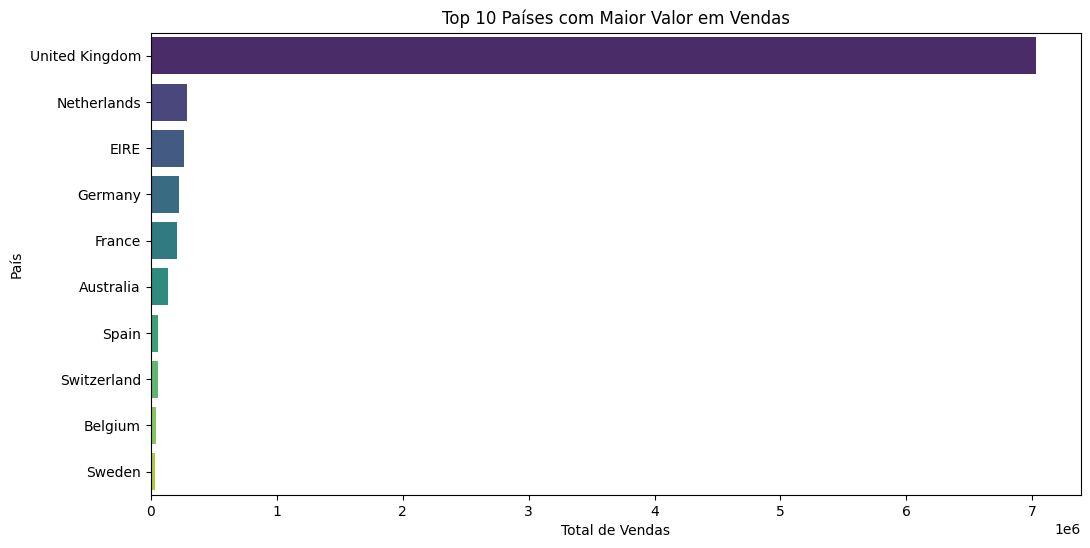

In [15]:
# Top 10 países com maior valor em vendas
top_10_paises = df.groupby("Country")["TotalPrice"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_paises.values, y=top_10_paises.index, palette="viridis")
plt.title("Top 10 Países com Maior Valor em Vendas")
plt.xlabel("Total de Vendas")
plt.ylabel("País")
plt.show()

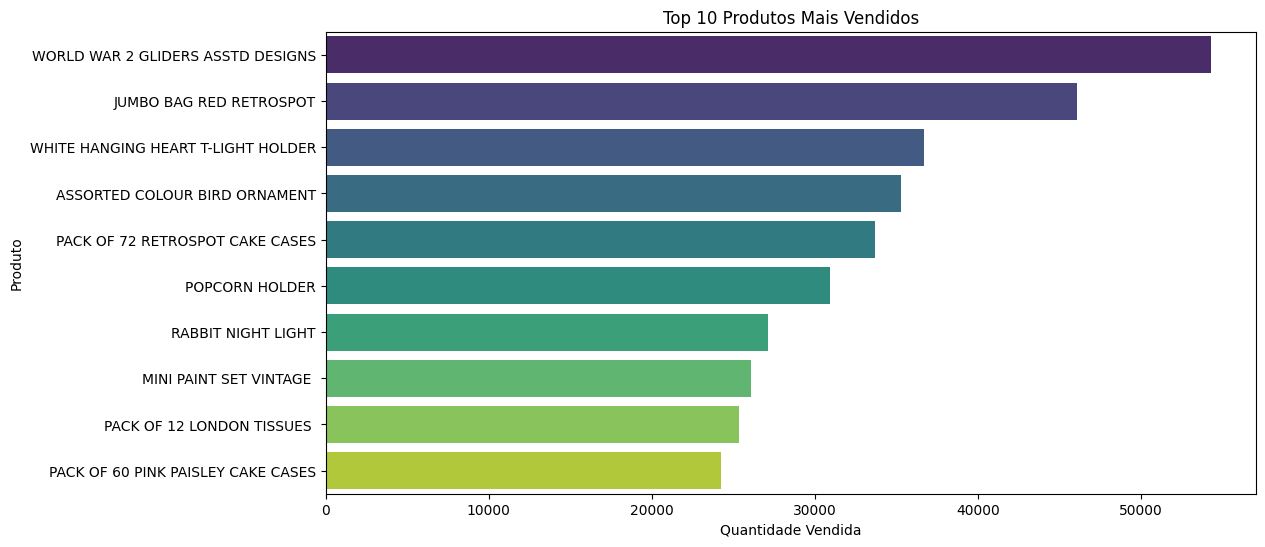

In [16]:
# Top 10 produtos mais vendidos
top_10_produtos = df.groupby("Description")["Quantity"].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_produtos.values, y=top_10_produtos.index, palette="viridis")
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Quantidade Vendida")
plt.ylabel("Produto")
plt.show()

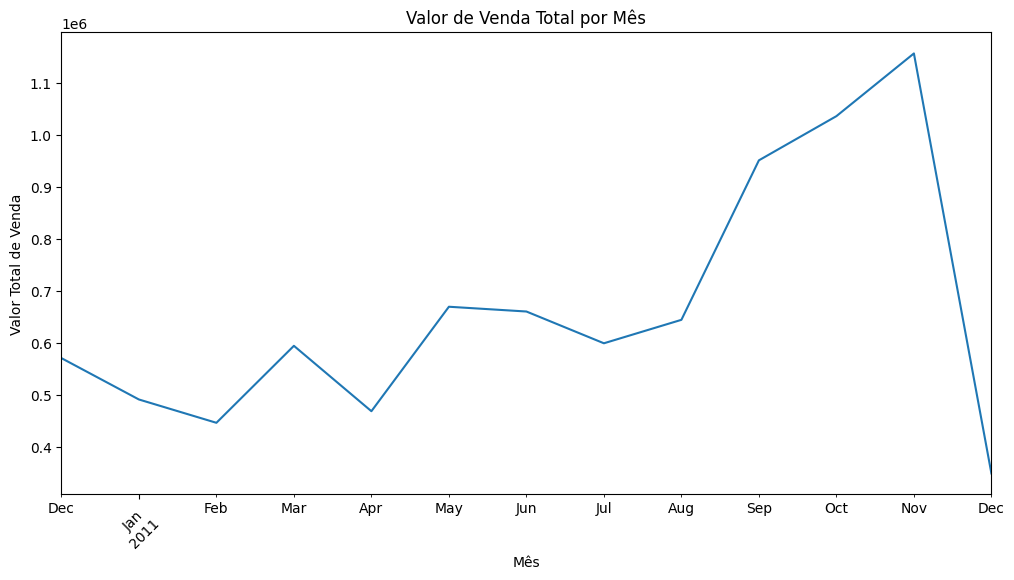

In [17]:
# Valor de venda total por mês
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")
venda_total_por_mes = df.groupby("InvoiceMonth")["TotalPrice"].sum()
plt.figure(figsize=(12, 6))
venda_total_por_mes.plot(kind="line")
plt.title("Valor de Venda Total por Mês")
plt.xlabel("Mês")
plt.ylabel("Valor Total de Venda")
plt.xticks(rotation=45)
plt.show()

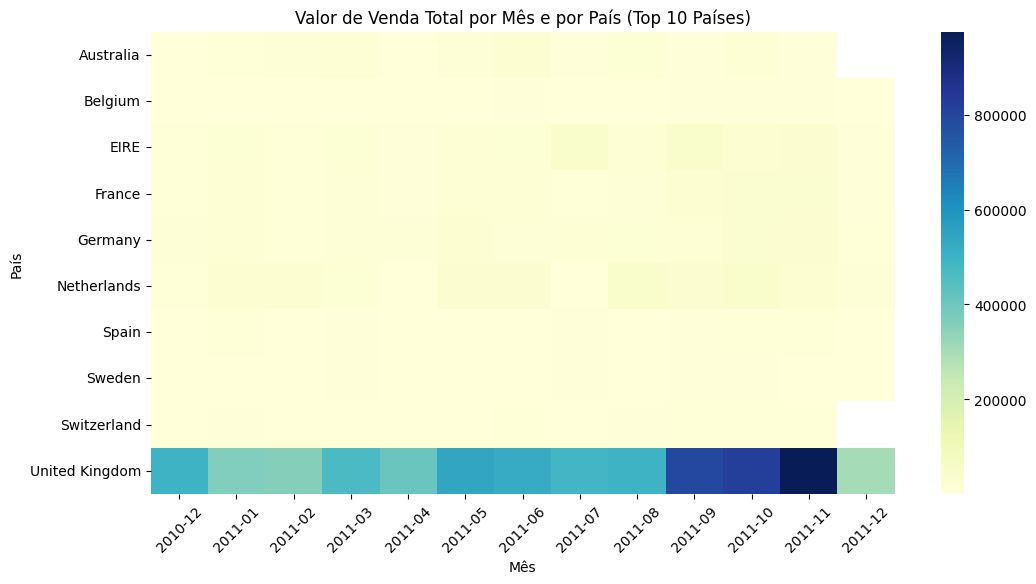

In [18]:
# Valor de venda total por mês e por país (considerando apenas os top 10 países)
top_10_paises = df.groupby("Country")["TotalPrice"].sum().nlargest(10).index
venda_total_por_mes_pais = df[df["Country"].isin(top_10_paises)].groupby(["Country", "InvoiceMonth"])["TotalPrice"].sum().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(venda_total_por_mes_pais, cmap="YlGnBu")
plt.title("Valor de Venda Total por Mês e por País (Top 10 Países)")
plt.xlabel("Mês")
plt.ylabel("País")
plt.xticks(rotation=45)
plt.show()

In [19]:
# Etapa 10: Cálculo do RFM
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (last_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "mean"
})
rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.to_csv("output.csv")